1/1 [==============================] - 2s 2s/step


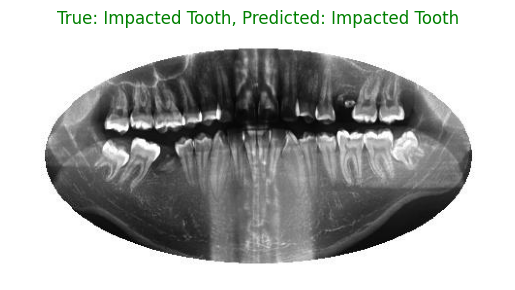

True label: Impacted Tooth
Predicted label: Impacted Tooth


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the model without the optimizer
model = load_model('./assets/cdss/best_model_tf.h5', compile=False)

# Compile the model with a new optimizer
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Function to preprocess the image
IMG_SIZE = (256, 256)  # Use the same image size as your training data

def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(IMG_SIZE)
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Class dictionary with string keys to match annotations
classes = {'Fillings': 0, 'Implant': 1, 'Impacted Tooth': 2, 'Cavity': 3}
reverse_classes = {v: k for k, v in classes.items()}

# Path to your image
image_path = r'Dental_Radiography\test\0161_jpg.rf.a54ad347955227c3eb7d1cfb1af9c51e.jpg'
image_name = image_path.split('\\')[-1]

# Preprocess the image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = reverse_classes[predicted_class]

# Display the image and the labels
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()

print(f"Predicted label: {predicted_label}")